### To extract stock information
To extract stock information we will use `yfinance` module which is a convenient way to download data from Yahoo Finance. The official API for Yahoo Finance was decommissioned some time back. More details about this module can be found [here.](https://aroussi.com/post/python-yahoo-finance) 

In [1]:
from requests import get 
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
import time as time 
from tqdm import tqdm
import yfinance as yf

from IPython.core.display import clear_output

In [2]:
#----- PLOTTING PARAMS ----# 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("husl")
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plot_params = {
'font.size' : 30,
'axes.titlesize' : 24,
'axes.labelsize' : 20,
'axes.labelweight' : 'bold',
'lines.linewidth' : 3,
'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
}
 
plt.rcParams.update(plot_params)

## 1. Generate list of S&P 500 companies 

### Parse wikipedia to generate a list 

In [3]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = get(wiki_url)
html_soup = BeautifulSoup(response.text, 'html.parser')
tab = html_soup.find("table",{"class":"wikitable sortable"})

In [4]:
column_headings = [entry.text.strip() for entry in tab.findAll('th')]
print(column_headings)

['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'CIK', 'Founded']


In [5]:
SP_500_dict = {keys:[] for keys in column_headings}

In [6]:
for i, name in enumerate(SP_500_dict.keys()):
    print(i, name)

0 Symbol
1 Security
2 SEC filings
3 GICS Sector
4 GICS Sub-Industry
5 Headquarters Location
6 Date first added
7 CIK
8 Founded


### Populate each row entry as per company data

In [7]:
for row_entry in tab.findAll('tr')[1:]:
    row_elements = row_entry.findAll('td')
    for key, _elements in zip(SP_500_dict.keys(), row_elements):
        SP_500_dict[key].append(_elements.text.strip())

In [8]:
SP_500_df = pd.DataFrame(SP_500_dict, columns=SP_500_dict.keys())

In [9]:
SP_500_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,0000109380,1873


In [10]:
SP_500_df['GICS Sector'].value_counts()

Information Technology    75
Industrials               74
Financials                65
Consumer Discretionary    63
Health Care               62
Consumer Staples          32
Real Estate               29
Materials                 28
Utilities                 28
Communication Services    26
Energy                    23
Name: GICS Sector, dtype: int64

### Visualize distribution of the companies as per sectors

(-1.25, 1.25, -1.25, 1.25)

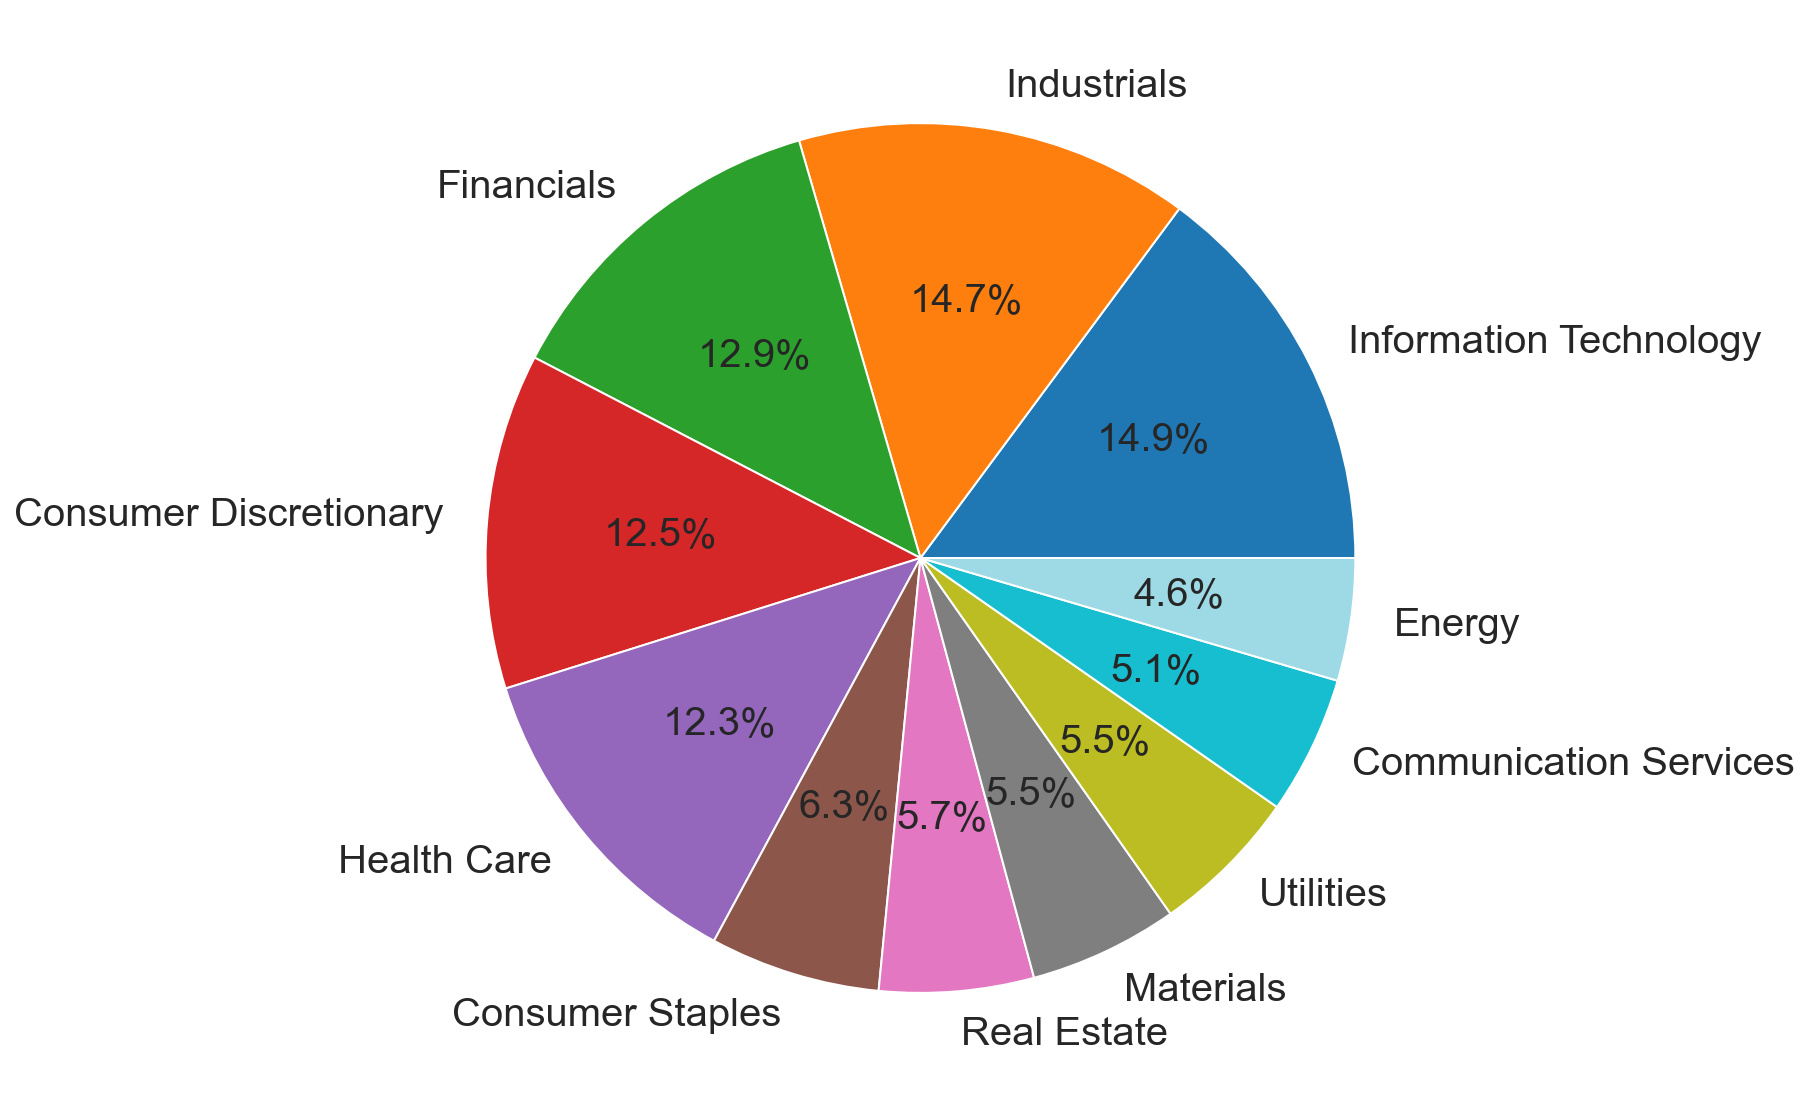

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
SP_500_df['GICS Sector'].value_counts().plot.pie(y='GICS Sector', autopct='%1.1f%%', fontsize=20, ax = ax, colormap='tab20')
plt.axis('off')

In [12]:
SP_500_df.loc[ SP_500_df['GICS Sector'] == 'Energy']

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
44,APA,APA Corporation,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,0000006769,1954
59,BKR,Baker Hughes Co,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",2017-07-07,0001701605,2017
80,COG,Cabot Oil & Gas,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,0000858470,1989
101,CVX,Chevron Corp.,reports,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,0000093410,1879
121,COP,ConocoPhillips,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1957-03-04,0001163165,2002
140,DVN,Devon Energy,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,0001090012,1971
142,FANG,Diamondback Energy,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,0001539838,2007
169,EOG,EOG Resources,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2000-11-02,0000821189,1999
183,XOM,Exxon Mobil Corp.,reports,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,0000034088,1999
219,HAL,Halliburton Co.,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",1957-03-04,0000045012,1919


**We can parse these tables and search companies based on the sector**

In [13]:
SP_500_df.loc[ SP_500_df['GICS Sector'] == 'Information Technology']

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
6,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,0000796343,1982
7,AMD,Advanced Micro Devices,reports,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,0000002488,1969
13,AKAM,Akamai Technologies,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,0001086222,1998
38,APH,Amphenol Corp,reports,Information Technology,Electronic Components,"Wallingford, Connecticut",2008-09-30,0000820313,1932
...,...,...,...,...,...,...,...,...,...
475,V,Visa Inc.,reports,Information Technology,Data Processing & Outsourced Services,"San Francisco, California",2009-12-21,0001403161,1958
489,WDC,Western Digital,reports,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,0000106040,1970
490,WU,Western Union Co,reports,Information Technology,Data Processing & Outsourced Services,"Englewood, Colorado",2006-09-29,0001365135,1851
498,XLNX,Xilinx,reports,Information Technology,Semiconductors,"San Jose, California",1999-11-08,0000743988,1984


## Get total number of Shares

We will use `yfinance` to extact Tickr information for each SP500 company and use pandas `datareader` 

```python
yf_tickr = yf.Ticker('ADBE')
yf_tickr.info['sharesOutstanding'] #info has good summary info for the stock 
```

In [14]:
import yfinance as yf

In [15]:
START_DATE = "2020-01-01"
END_DATE = "2020-07-26"

In [16]:
yf_tickr = yf.Ticker('TSLA')

In [17]:
_shares_outstanding = yf_tickr.info['sharesOutstanding']
_previous_close = yf_tickr.info['previousClose']
print('Outstanding shares: {}'.format(_shares_outstanding))
print('Market Cap: {} Million USD'.format((_shares_outstanding * _previous_close)/10**6))

Outstanding shares: 959854016
Market Cap: 676447.51923584 Million USD


In [18]:
df_tckr = yf_tickr.history(start=START_DATE, end=END_DATE, interval="1wk", actions=False)
df_tckr['Market_Cap'] = df_tckr['Open'] * _shares_outstanding
df_tckr['YTD'] = (df_tckr['Open'] - df_tckr['Open'][0]) * 100 / df_tckr['Open'][0]

Text(0, 0.5, '% YTD change (Weekly basis)')

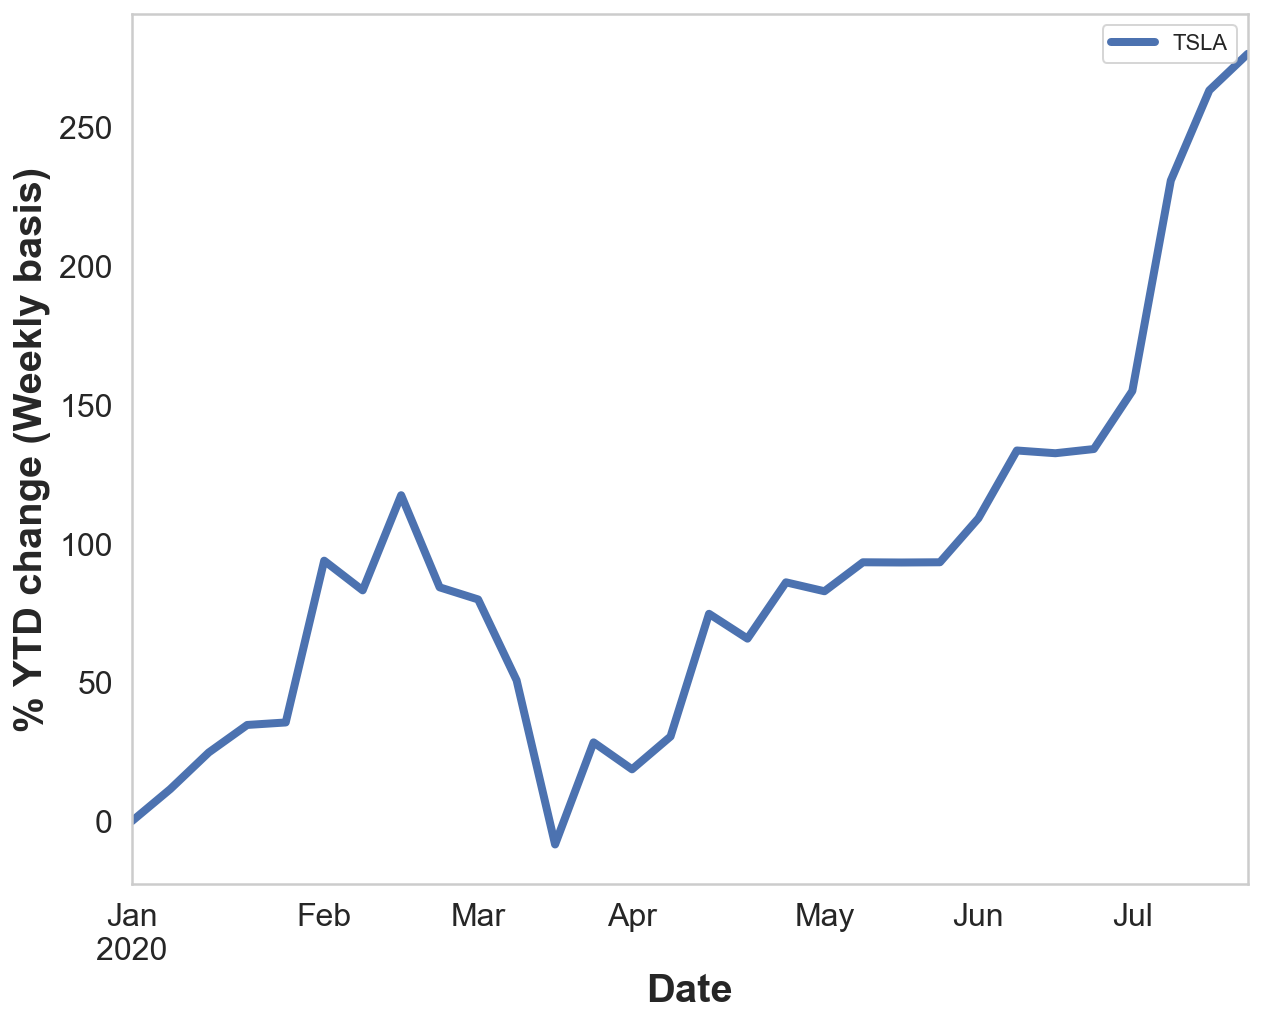

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_tckr.plot(use_index=True, y="YTD",ax=ax, linewidth=4, grid=False, label='TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('% YTD change (Weekly basis)')

### Extend this to plotting for multiple companies 

In [20]:
import time as time 
def plot_market_cap(tickr_list, START_DATE, END_DATE):
    
    total_data = {}
    for tickr in tickr_list:
        total_data[tickr] = {}
        print('Looking at: {}'.format(tickr))
        yf_tickr = yf.Ticker(tickr)
        #try:
        #    _shares_outstanding = yf_tickr.info['sharesOutstanding']
        #except(IndexError):
        #    print('Shares outstanding not found')
        #    _shares_outstanding = None
        
        df_tckr = yf_tickr.history(start=START_DATE, end=END_DATE, actions=False)
        df_tckr['YTD'] = (df_tckr['Open'] - df_tckr['Open'][0]) * 100 / df_tckr['Open'][0]
            
        total_data[tickr]['hist'] = df_tckr
        #total_data[tickr]['shares'] = _shares_outstanding
        time.sleep(np.random.randint(10))
        
    return total_data

In [21]:
tickr_list = ['AAPL', 'TSLA','FB','DAL','XOM']
data = plot_market_cap(tickr_list, START_DATE, END_DATE)

Looking at: AAPL
Looking at: TSLA
Looking at: FB
Looking at: DAL
Looking at: XOM


In [22]:
company_name = [SP_500_df[SP_500_df['Symbol'].str.contains(i)]['Security'].values[0] for i in tickr_list]

In [23]:
company_name

['Apple Inc.',
 'Tesla, Inc.',
 'Facebook, Inc.',
 'Delta Air Lines Inc.',
 'Exxon Mobil Corp.']

In [24]:
print(len(data['AAPL']['hist']['YTD']))

142


In [42]:
ytd_stat = pd.DataFrame()
for tickr in tickr_list: 
    ytd_stat[tickr] = data[tickr]['hist']['YTD'].values
ytd_stat['Date'] = data['AAPL']['hist'].index

In [43]:
ytd_stat

,AAPL,TSLA,FB,DAL,XOM,Date
0,0.000000,0.000000,0.000000,0.000000,0.000000,2020-01-02
1,0.307187,3.769137,0.222494,-2.426609,1.566061,2020-01-03
2,-0.827016,3.762073,-0.024185,-3.292044,0.113891,2020-01-06
3,1.215244,8.692576,2.935916,-1.730873,0.370157,2020-01-07
4,0.310568,11.590101,3.022975,-2.002382,-0.185078,2020-01-08
...,...,...,...,...,...,...
137,30.850611,257.835096,16.111244,-53.866312,-36.389268,2020-07-20
138,34.589490,286.320361,19.090690,-54.720640,-36.477584,2020-07-21
139,31.223803,276.678424,16.207978,-55.181977,-35.005460,2020-07-22
140,31.637726,295.512370,15.903267,-55.574967,-36.109559,2020-07-23


## Final plot for returns 

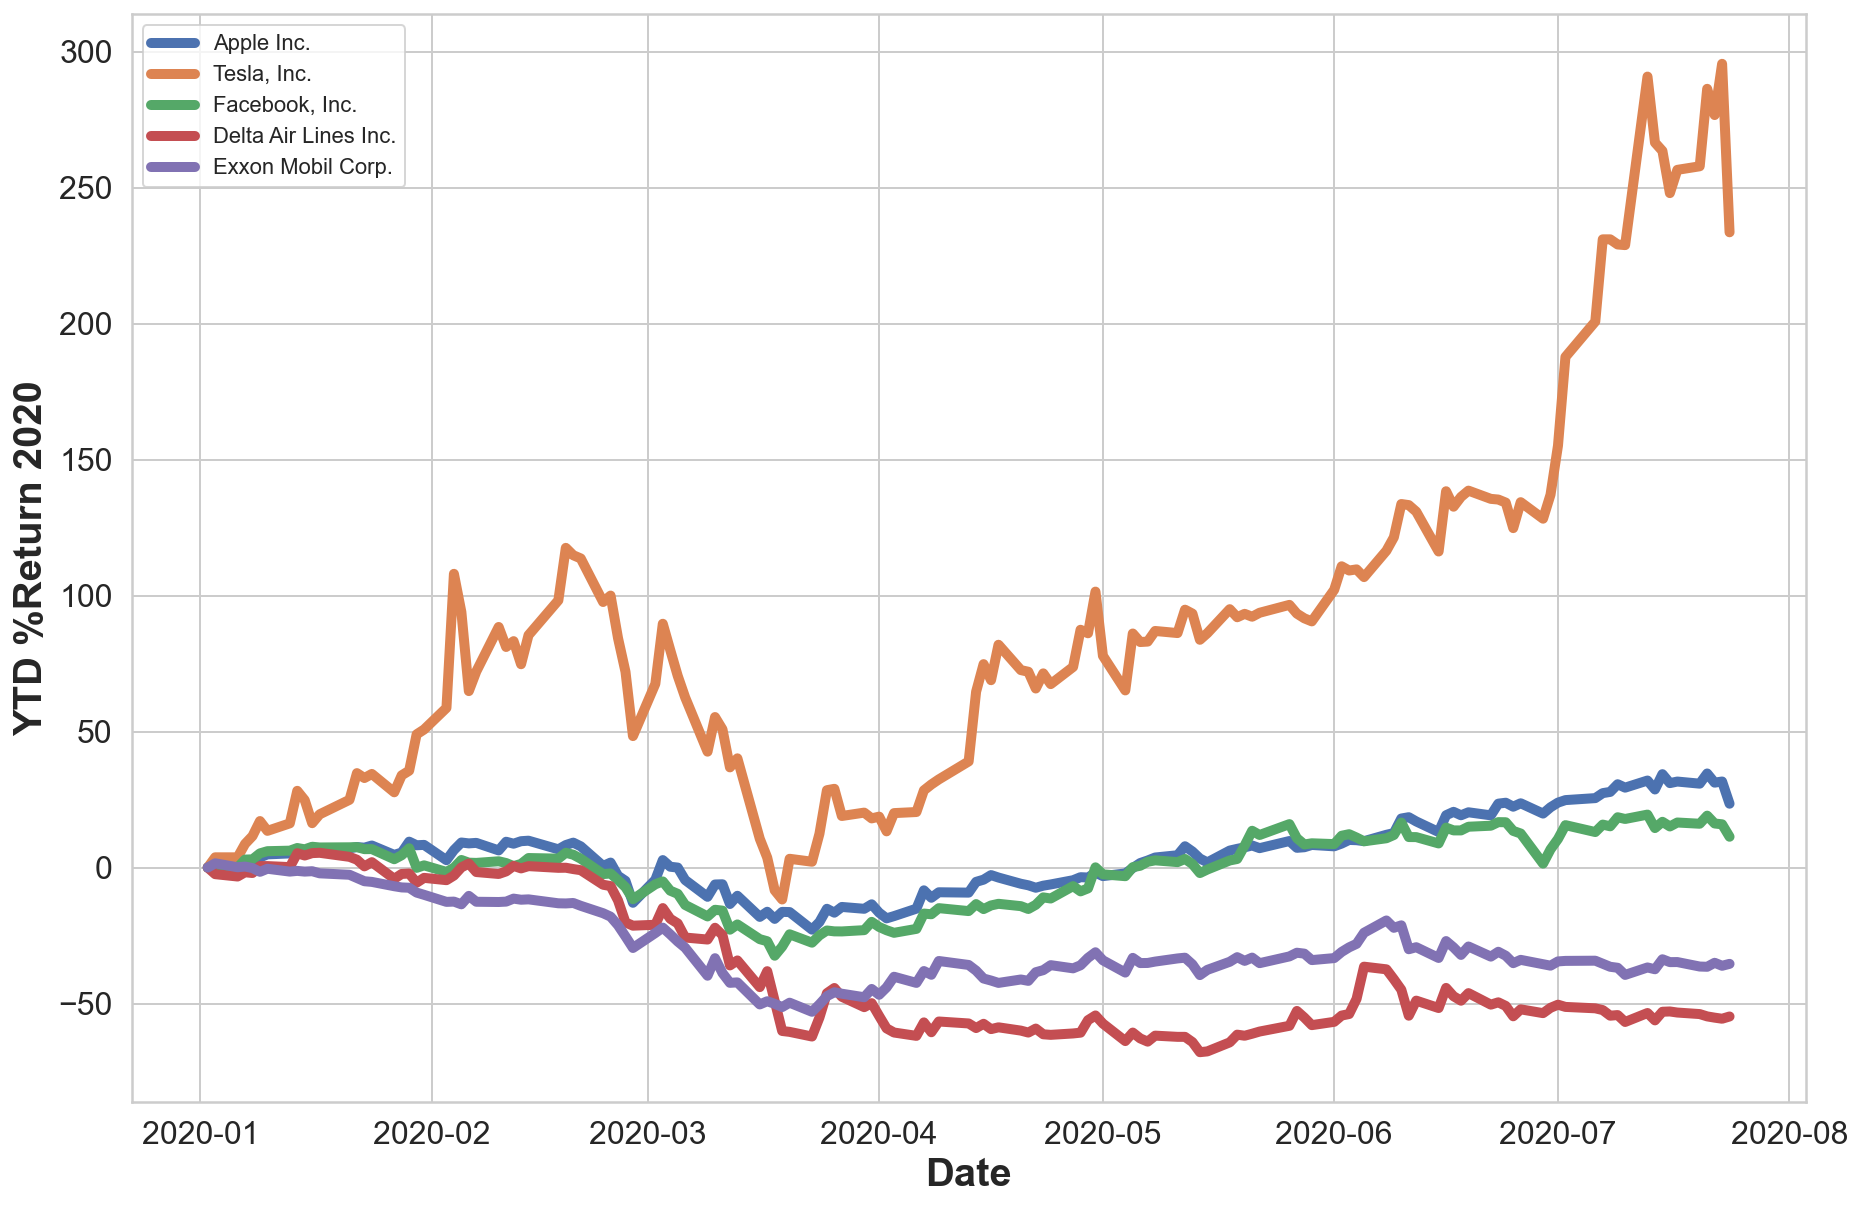

In [44]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
for i, tickr in enumerate(tickr_list):
    ax.plot(ytd_stat['Date'], ytd_stat[tickr], linewidth=5.0, label=company_name[i])
ax.set_ylabel('YTD %Return 2020')
ax.set_xlabel('Date')
ax.legend()